<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DeepLearning/blob/main/03.NLP-with-tensorflow2.0/%ED%95%B4%EC%84%A4/ch03_01_NLP%EA%B8%B0%EC%B4%88_%ED%85%8D%EC%8A%A4%ED%8A%B8%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.01 NLP기초 - 텍스트 처리
---

* 날짜:
* 이름:

## 학습내용
    - 텍스트 전처리 과정을 이해한다.
      * 텍스트 토큰화
      * 텍스트 인덱싱
      * 원-핫 인코딩
      * 텍스트 임베딩
    - 간단한 문장을 분류하는 딥러닝 모델을 구현한다.


```
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning
```

In [1]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 669, done.
remote: Counting objects: 100% (242/242), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 669 (delta 147), reused 188 (delta 124), pack-reused 427
Receiving objects: 100% (669/669), 37.09 MiB | 26.82 MiB/s, done.
Resolving deltas: 100% (340/340), done.


```
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/02.케라스_창시자에게_배우는_딥러닝/scripts')
from import_lib import *
```

In [2]:
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/02.케라스_창시자에게_배우는_딥러닝/scripts')
from import_lib import *

## 텍스트 데이터 처리
---

### **| 전처리 구현하기**

#### **딕셔너리 제작**

```
"문장이 이런식으로 이루어져 있습니다."
# 1, 토큰화
"문장 이 이런 식 으로 이루 어져  있습니다" # -> 어떻게 토큰화 할지 라이브러리 존재~
"hello everyone"
# 모든데이터는 숫자!
2. 단어 인덱싱
# 모든 토큰에 대해 숫자로 매핑
# 인덱싱 위해서는 딕셔너리 필요
```

In [9]:
samples = ['very nice movie',
           'this movie is bad',
           'it is so bad',
           'wow it is a good movie']

word_dict = {}
for sample in samples:
  # 토큰화
  for token in sample.split(' '):
    #print(token)
    if token not in word_dict:
      word_dict[token]=len(word_dict)+1
print(word_dict)
print('모든 단어 개수: ', len(word_dict))

{'very': 1, 'nice': 2, 'movie': 3, 'this': 4, 'is': 5, 'bad': 6, 'it': 7, 'so': 8, 'wow': 9, 'a': 10, 'good': 11}
모든 단어 개수:  11


In [ ]:
클래스가 3개일때

1: 1 0 0 
2: 0 1 0
3: 0 0 1

클래스개수가 단어 개수만큼 (5000개 단어 ~ 10000개 단어~)
1 1 000...0
2
...
5000 0 ....1

#### **단어 인덱싱**

In [12]:
# 문장 -> 토큰 -> 숫자
def word_indexing(sample, word_dict):
  indexed = []  
  for token in sample.split(' '):
    num = word_dict[token]
    indexed.append(num)
  return np.array(indexed)
idx = 1
samples[idx], word_indexing(samples[idx], word_dict)

('this movie is bad', array([4, 3, 5, 6]))

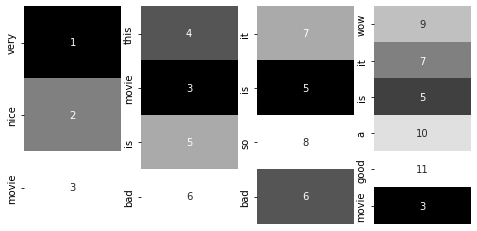

In [19]:
plt.figure(figsize=(len(samples)*2, 4))
for i, sample in enumerate(samples):
  indexed = word_indexing(sample, word_dict)
  plt.subplot(1, len(samples), i+1)
  sns.heatmap(indexed.reshape(len(indexed), 1), cmap='gray', 
              annot=True, cbar=False,
              yticklabels=sample.split(' '),
              xticklabels=[])
plt.show()

#### **원-핫 인코딩**

In [28]:
# sample_mxlen : 한 문장안에 몇개의 토큰까지 허락
# total_words : 딕셔너리 안에 있는 모든 단어 수
def word_onehot(sample, sample_mxlen, total_words):
  onehot = np.zeros((sample_mxlen, total_words+1)) # 단어인덱스 1~11, 파이썬 인덱스 0~11 총 12개 
  for i, token in enumerate(sample.split(' ')):
    if i == sample_mxlen: break # 샘플이 너무길면 자르기
    index = word_dict[token] # 토큰이 몇번째 해당하는지 반환
    onehot[i, index]=1 # i번째 토큰, index 해당하는 자리에 1을 할당
  return onehot

idx = 3
print(samples[idx])
print(word_indexing(samples[idx], word_dict))
print(word_onehot(samples[idx], 5, len(word_dict)))

wow it is a good movie
[ 9  7  5 10 11  3]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


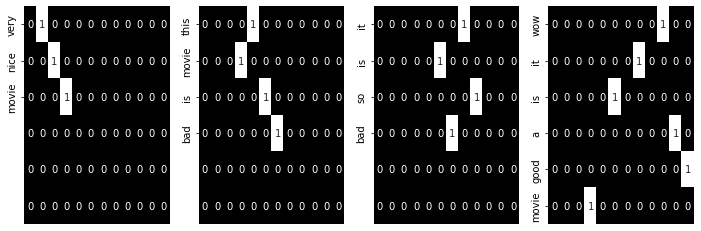

In [30]:
plt.figure(figsize=(len(samples)*3, 4))
for i, sample in enumerate(samples):
  onehot = word_onehot(samples[i], 6, len(word_dict))
  plt.subplot(1, len(samples), i+1)
  sns.heatmap(onehot, cmap='gray', 
              annot=True, cbar=False,
              yticklabels=sample.split(' '),
              xticklabels=[])
plt.show()

### | **텐서플로우 케라스 Tokenizer**


In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
tk = Tokenizer()
tk.fit_on_texts(samples)

In [37]:
print('생성된 딕셔너리: ', tk.word_index)
print('단어 카운트 :', tk.word_counts)
print('단어 하나가 몇개의 문장에 포함되어 있는가', tk.word_docs)
print('문장(샘플) 카운트: ', tk.document_count)

생성된 딕셔너리:  {'movie': 1, 'is': 2, 'bad': 3, 'it': 4, 'very': 5, 'nice': 6, 'this': 7, 'so': 8, 'wow': 9, 'a': 10, 'good': 11}
단어 카운트 : OrderedDict([('very', 1), ('nice', 1), ('movie', 3), ('this', 1), ('is', 3), ('bad', 2), ('it', 2), ('so', 1), ('wow', 1), ('a', 1), ('good', 1)])
단어 하나가 몇개의 문장에 포함되어 있는가 defaultdict(<class 'int'>, {'movie': 3, 'very': 1, 'nice': 1, 'is': 3, 'bad': 2, 'this': 1, 'it': 2, 'so': 1, 'good': 1, 'wow': 1, 'a': 1})
문장(샘플) 카운트:  4


#### **단어 인덱싱**

In [38]:
seqs = tk.texts_to_sequences(samples)
print('단어 인덱싱 결과', seqs)

단어 인덱싱 결과 [[5, 6, 1], [7, 1, 2, 3], [4, 2, 8, 3], [9, 4, 2, 10, 11, 1]]


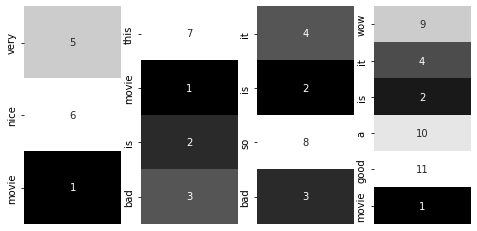

In [40]:
plt.figure(figsize=(len(samples)*2, 4))
for i, sample in enumerate(samples):
  indexed = np.array(seqs[i])
  plt.subplot(1, len(samples), i+1)
  sns.heatmap(indexed.reshape(len(indexed), 1), cmap='gray', 
              annot=True, cbar=False,
              yticklabels=sample.split(' '),
              xticklabels=[])
plt.show()

#### **패딩**

In [43]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

pads = pad_sequences(seqs, 6)
print('패딩 결과:\n', pads, pads.shape)

패딩 결과:
 [[ 0  0  0  5  6  1]
 [ 0  0  7  1  2  3]
 [ 0  0  4  2  8  3]
 [ 9  4  2 10 11  1]] (4, 6)


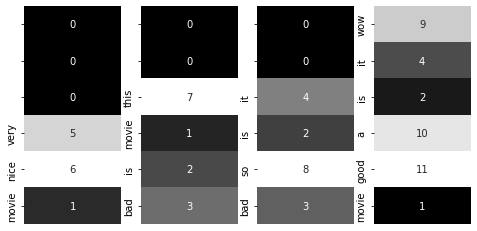

In [51]:
plt.figure(figsize=(len(samples)*2, 4))
for i, sample in enumerate(samples):
  plt.subplot(1, len(samples), i+1)
  sns.heatmap(pads[i].reshape(len(indexed), 1), cmap='gray', 
              annot=True, cbar=False,
              yticklabels=['']*(6-len(sample.split(' ')))+sample.split(' '),
              xticklabels=[])
plt.show()

#### **원핫 인코딩**

In [52]:
len(word_dict)

11

In [54]:
# 인풋 시퀀스는 길이가 동일!
onehots = utils.to_categorical(pads, num_classes=len(word_dict)+1) # 단어 개수 +1 해주기 
# +1 하는 이유는 단어가 없거나/ 딕셔너리에 존재하지 않는 단어 는 첫번째 클래스에 할당 
print(pads.shape, onehots.shape)

(4, 6) (4, 6, 12)


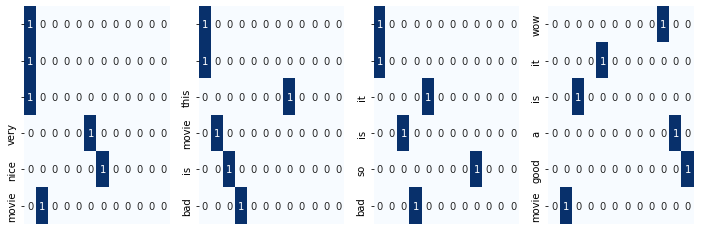

In [57]:
plt.figure(figsize=(len(samples)*3, 4))
for i, sample in enumerate(samples):
  plt.subplot(1, len(samples), i+1)
  sns.heatmap(onehots[i], cmap='Blues', 
              annot=True, cbar=False,
              yticklabels=['']*(6-len(sample.split(' ')))+sample.split(' '),
              xticklabels=[])
plt.show()

In [ ]:
# 원핫 인코딩 결과
# 행 : 샘플 하나의 최대 길이
# 열 : 단어 하나가 몇개의 dimension으로 표현될 수 있는가

#### **단어 임베딩**

In [ ]:
# 단어 하나가 표현할 수 있는 dimesion이 자유롭다. 
# 원핫 인코딩 처럼 단어 하나를 딕셔너리에 있는 단어 수의 크기만큼의 디맨젼으로 표현 하지 않아도 됨
# 1: word 2: hello 3: any
# my 1 0 0 0 
# word 0 1 0 0 

In [63]:
pads.shape

(4, 6)

In [122]:
# 인풋 : 패딩된 seqences
# 딕셔너리의 모든 영어단어수 11 + 1
embedding_layer = layers.Embedding(input_dim=12 , output_dim=3) # 원핫처리후 임베딩
# 학습이 필요한 레이어

In [123]:
embeded = embedding_layer(pads[0])
embeded.shape

TensorShape([6, 3])

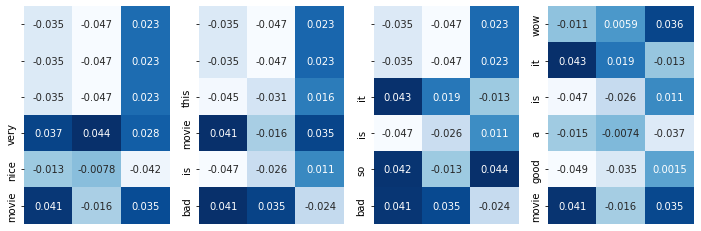

In [124]:
plt.figure(figsize=(len(samples)*3, 4))
for i, sample in enumerate(samples):
  embeded = embedding_layer(pads[i])
  plt.subplot(1, len(samples), i+1)
  sns.heatmap(embeded, cmap='Blues', 
              annot=True, cbar=False,
              yticklabels=['']*(6-len(sample.split(' ')))+sample.split(' '),
              xticklabels=[])
plt.show()

## 간단 예제
---

### | **텍스트 전처리**

In [96]:
docs = ["너무 재미 있네요",
        "최고 예요",
        "참 잘 만든 영화 예요",
        "추천 하고 싶은 영화 입니다",
        "한번 더 보고 싶네요",
        "글쎄 요","별로 예요","생각 보다 지루 하네요",
        "연기 가 어색 해요","재미 있어서 한번 더 볼거에요", "별로 재미 가 없어요", "재미 있고 잘 만든 영화 입니다",
        "재미 가 별로 없어요", "별로 예요"]
classes = np.array([1,1,1,1,1,0,0,0,0,1,0,1,0,0]) # 긍정 1 부정 0
print(len(docs), classes.shape)

# 토큰
token = Tokenizer()
token.fit_on_texts(docs)
print('딕셔너리: ', token.word_index)
print('딕셔너리 총 단어 개수: ', len(token.word_index))

# 인덱싱
x = token.texts_to_sequences(docs)
print(x)
# 패딩
x_pad = pad_sequences(x, 6) # 한 문장에 최대 몇개의 단어 ?
print('패딩 결과\n', x_pad, x_pad.shape)

14 (14,)
딕셔너리:  {'재미': 1, '예요': 2, '별로': 3, '영화': 4, '가': 5, '잘': 6, '만든': 7, '입니다': 8, '한번': 9, '더': 10, '없어요': 11, '너무': 12, '있네요': 13, '최고': 14, '참': 15, '추천': 16, '하고': 17, '싶은': 18, '보고': 19, '싶네요': 20, '글쎄': 21, '요': 22, '생각': 23, '보다': 24, '지루': 25, '하네요': 26, '연기': 27, '어색': 28, '해요': 29, '있어서': 30, '볼거에요': 31, '있고': 32}
딕셔너리 총 단어 개수:  32
[[12, 1, 13], [14, 2], [15, 6, 7, 4, 2], [16, 17, 18, 4, 8], [9, 10, 19, 20], [21, 22], [3, 2], [23, 24, 25, 26], [27, 5, 28, 29], [1, 30, 9, 10, 31], [3, 1, 5, 11], [1, 32, 6, 7, 4, 8], [1, 5, 3, 11], [3, 2]]
패딩 결과
 [[ 0  0  0 12  1 13]
 [ 0  0  0  0 14  2]
 [ 0 15  6  7  4  2]
 [ 0 16 17 18  4  8]
 [ 0  0  9 10 19 20]
 [ 0  0  0  0 21 22]
 [ 0  0  0  0  3  2]
 [ 0  0 23 24 25 26]
 [ 0  0 27  5 28 29]
 [ 0  1 30  9 10 31]
 [ 0  0  3  1  5 11]
 [ 1 32  6  7  4  8]
 [ 0  0  1  5  3 11]
 [ 0  0  0  0  3  2]] (14, 6)


### | **모델 구현 및 학습**

In [ ]:
# 단어 하나가 원-핫인코딩 되면 크기몇의 벡터 로 표현? : 32 + 1(딕셔너리에 없는/비어있는 단어) 

In [104]:
def create_model():
  x = layers.Input(shape=6)
  y = layers.Embedding(33, 8)(x) 
  y = layers.Flatten()(y)
  y = layers.Dense(1, activation='sigmoid')(y) # 이진분류
  return models.Model(x,y)
model=create_model()
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 6)]               0         
                                                                 
 embedding_11 (Embedding)    (None, 6, 8)              264       
                                                                 
 flatten_2 (Flatten)         (None, 48)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 49        
                                                                 
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


In [111]:
model.compile(optimizer='adam',
               loss = 'binary_crossentropy',
               metrics=['acc'])
model.fit(x_pad, classes, epochs=20)

Epoch 1/20
1/1 [==============================] - 1s 594ms/step - loss: 0.6483 - acc: 0.9286
Epoch 2/20
1/1 [==============================] - 0s 9ms/step - loss: 0.6460 - acc: 0.9286
Epoch 3/20
1/1 [==============================] - 0s 12ms/step - loss: 0.6437 - acc: 0.9286
Epoch 4/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6414 - acc: 0.9286
Epoch 5/20
1/1 [==============================] - 0s 14ms/step - loss: 0.6391 - acc: 0.9286
Epoch 6/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6367 - acc: 0.9286
Epoch 7/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6343 - acc: 0.9286
Epoch 8/20
1/1 [==============================] - 0s 13ms/step - loss: 0.6320 - acc: 0.9286
Epoch 9/20
1/1 [==============================] - 0s 12ms/step - loss: 0.6296 - acc: 0.9286
Epoch 10/20
1/1 [==============================] - 0s 14ms/step - loss: 0.6272 - acc: 0.9286
Epoch 11/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6247 

### **| 예측**

In [112]:
# 0.5기준, 0이면 부정, 1이면 긍정
preds = model.predict(x_pad)
for i in range(len(preds)):
  print(docs[i], np.round(preds[i][0]))

너무 재미 있네요 1.0
최고 예요 0.0
참 잘 만든 영화 예요 1.0
추천 하고 싶은 영화 입니다 1.0
한번 더 보고 싶네요 1.0
글쎄 요 0.0
별로 예요 0.0
생각 보다 지루 하네요 0.0
연기 가 어색 해요 0.0
재미 있어서 한번 더 볼거에요 1.0
별로 재미 가 없어요 0.0
재미 있고 잘 만든 영화 입니다 1.0
재미 가 별로 없어요 0.0
별로 예요 0.0


In [117]:
docs_test = ['생각 보다 별로 예요', '별로']
# 인덱싱
x_test = token.texts_to_sequences(docs_test)
print(x_test)
# 패딩
x_test = pad_sequences(x_test, 6) # 한 문장에 최대 몇개의 단어 ?
print('패딩 결과\n', x_test, x_test.shape)

[[23, 24, 3, 2], [3]]
패딩 결과
 [[ 0  0 23 24  3  2]
 [ 0  0  0  0  0  3]] (2, 6)


In [118]:
# 0.5기준, 0이면 부정, 1이면 긍정
preds = model.predict(x_test)
for i in range(len(preds)):
  print(docs_test[i], preds[i][0])

생각 보다 별로 예요 0.44350976
별로 0.47434914
